In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citypy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Import the requests library.
import requests

# Import the API Key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eae283ab1f5578df1cbfd6dfc98ead41


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of Set 1 | qaanaaq
Processing Record 24 of Set 1 | qaanaaq
Processing Record 25 of Set 1 | qaanaaq
Processin

In [11]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Processing Record 16 of Set 13 | tiksi
Processing Record 17 of Set 13 | vaini
Processing Record 18 of Set 13 | san francisco
Processing Record 19 of Set 13 | ilhabela
Processing Record 20 of Set 13 | ribeira grande
Processing Record 21 of Set 13 | lorengau
Processing Record 22 of Set 13 | talnakh
Processing Record 23 of Set 13 | albany
Processing Record 24 of Set 13 | punta arenas
Processing Record 25 of Set 13 | avarua
Processing Record 26 of Set 13 | tura
Processing Record 27 of Set 13 | wetaskiwin
Processing Record 28 of Set 13 | hilo
Processing Record 29 of Set 13 | rikitea
Processing Record 30 of Set 13 | port blair
Processing Record 31 of Set 13 | guymon
Processing Record 32 of Set 13 | carnarvon
Processing Record 33 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 34 of Set 13 | amderma
City not found. Skipping...
Processing Record 35 of Set 13 | kaihua
Processing Record 36 of Set 13 | codrington
Processing Record 37 of Set 13 | bethel
Processing Record 38 of S

Processing Record 40 of Set 16 | karpogory
Processing Record 41 of Set 16 | japura
Processing Record 42 of Set 16 | naryan-mar
Processing Record 43 of Set 16 | tuatapere
Processing Record 44 of Set 16 | cayenne
Processing Record 45 of Set 16 | leonidovo
Processing Record 46 of Set 16 | atambua
Processing Record 47 of Set 16 | rantepao
Processing Record 48 of Set 16 | pisco
Processing Record 49 of Set 16 | hami
Processing Record 50 of Set 16 | umzimvubu
City not found. Skipping...
Processing Record 1 of Set 17 | hoquiam
Processing Record 2 of Set 17 | sinop
Processing Record 3 of Set 17 | barrow
Processing Record 4 of Set 17 | krasnokamensk
Processing Record 5 of Set 17 | george town
Processing Record 6 of Set 17 | aksu
Processing Record 7 of Set 17 | whitehorse
Processing Record 8 of Set 17 | ust-kamchatsk
City not found. Skipping...
Processing Record 9 of Set 17 | murgab
Processing Record 10 of Set 17 | vila franca do campo
Processing Record 11 of Set 17 | churapcha
Processing Record 

Processing Record 22 of Set 20 | outjo
Processing Record 23 of Set 20 | touros
Processing Record 24 of Set 20 | hobyo
Processing Record 25 of Set 20 | fevralsk
City not found. Skipping...
Processing Record 26 of Set 20 | khor
Processing Record 27 of Set 20 | ca mau
Processing Record 28 of Set 20 | dubbo
Processing Record 29 of Set 20 | ossora
Processing Record 30 of Set 20 | mayo
Processing Record 31 of Set 20 | karakendzha
City not found. Skipping...
Processing Record 32 of Set 20 | bani walid
Processing Record 33 of Set 20 | muhos
Processing Record 34 of Set 20 | mandalgovi
Processing Record 35 of Set 20 | mehamn
Processing Record 36 of Set 20 | celestun
Processing Record 37 of Set 20 | haines junction
Processing Record 38 of Set 20 | usinsk
Processing Record 39 of Set 20 | borogontsy
Processing Record 40 of Set 20 | keti bandar
Processing Record 41 of Set 20 | catuday
Processing Record 42 of Set 20 | klaksvik
Processing Record 43 of Set 20 | boone
Processing Record 44 of Set 20 | fr

Processing Record 10 of Set 24 | ashford
Processing Record 11 of Set 24 | todos santos
Processing Record 12 of Set 24 | porbandar
Processing Record 13 of Set 24 | trindade
Processing Record 14 of Set 24 | manyana
Processing Record 15 of Set 24 | antigonish
Processing Record 16 of Set 24 | manado
Processing Record 17 of Set 24 | kahului
Processing Record 18 of Set 24 | barcelona
Processing Record 19 of Set 24 | thunder bay
Processing Record 20 of Set 24 | manaure
Processing Record 21 of Set 24 | beyneu
Processing Record 22 of Set 24 | fort nelson
Processing Record 23 of Set 24 | chontalpa
Processing Record 24 of Set 24 | valley city
Processing Record 25 of Set 24 | san lorenzo
Processing Record 26 of Set 24 | saleaula
City not found. Skipping...
Processing Record 27 of Set 24 | eyl
Processing Record 28 of Set 24 | hearst
Processing Record 29 of Set 24 | sakakah
Processing Record 30 of Set 24 | bac can
City not found. Skipping...
Processing Record 31 of Set 24 | namibe
Processing Record 

In [12]:
len(city_data)

561

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,31.50,97,86,9.28,RU,2021-05-29 20:00:15
1,Vaini,-21.2000,-175.2000,76.15,85,98,14.67,TO,2021-05-29 20:00:18
2,San Francisco,37.7749,-122.4194,79.14,77,75,5.01,US,2021-05-29 20:05:05
3,Ilhabela,-23.7781,-45.3581,82.87,59,83,5.82,BR,2021-05-29 20:01:44
4,Ribeira Grande,38.5167,-28.7000,66.60,77,75,4.61,PT,2021-05-29 20:00:37
5,Lorengau,-2.0226,147.2712,81.88,80,38,12.21,PG,2021-05-29 20:01:11
6,Talnakh,69.4865,88.3972,27.48,97,98,4.52,RU,2021-05-29 20:00:40
7,Albany,42.6001,-73.9662,52.72,76,100,6.24,US,2021-05-29 20:00:08
8,Punta Arenas,-53.1500,-70.9167,39.31,41,75,18.75,CL,2021-05-29 19:58:10
9,Avarua,-21.2078,-159.7750,77.05,61,16,3.44,CK,2021-05-29 20:00:13


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-05-29 20:00:15,71.6872,128.8694,31.50,97,86,9.28
1,Vaini,TO,2021-05-29 20:00:18,-21.2000,-175.2000,76.15,85,98,14.67
2,San Francisco,US,2021-05-29 20:05:05,37.7749,-122.4194,79.14,77,75,5.01
3,Ilhabela,BR,2021-05-29 20:01:44,-23.7781,-45.3581,82.87,59,83,5.82
4,Ribeira Grande,PT,2021-05-29 20:00:37,38.5167,-28.7000,66.60,77,75,4.61
5,Lorengau,PG,2021-05-29 20:01:11,-2.0226,147.2712,81.88,80,38,12.21
6,Talnakh,RU,2021-05-29 20:00:40,69.4865,88.3972,27.48,97,98,4.52
7,Albany,US,2021-05-29 20:00:08,42.6001,-73.9662,52.72,76,100,6.24
8,Punta Arenas,CL,2021-05-29 19:58:10,-53.1500,-70.9167,39.31,41,75,18.75
9,Avarua,CK,2021-05-29 20:00:13,-21.2078,-159.7750,77.05,61,16,3.44


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City Id")
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-05-29 20:00:15,71.6872,128.8694,31.50,97,86,9.28
1,Vaini,TO,2021-05-29 20:00:18,-21.2000,-175.2000,76.15,85,98,14.67
2,San Francisco,US,2021-05-29 20:05:05,37.7749,-122.4194,79.14,77,75,5.01
3,Ilhabela,BR,2021-05-29 20:01:44,-23.7781,-45.3581,82.87,59,83,5.82
4,Ribeira Grande,PT,2021-05-29 20:00:37,38.5167,-28.7000,66.60,77,75,4.61
...,...,...,...,...,...,...,...,...,...
556,Dhekiajuli,IN,2021-05-29 20:08:06,26.7000,92.5000,76.66,89,17,0.60
557,Kilcoole,IE,2021-05-29 20:08:06,53.1028,-6.0650,60.58,86,73,2.55
558,Rio Brilhante,BR,2021-05-29 20:08:07,-21.8019,-54.5464,89.83,29,100,9.04
559,Nadym,RU,2021-05-29 20:05:07,65.5333,72.5167,54.09,90,100,19.42


In [16]:
pd.read_csv("weather_data/cities.csv")

,City Id,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Tiksi,RU,2021-05-29 20:00:15,71.6872,128.8694,31.50,97,86,9.28
1,1,Vaini,TO,2021-05-29 20:00:18,-21.2000,-175.2000,76.15,85,98,14.67
2,2,San Francisco,US,2021-05-29 20:05:05,37.7749,-122.4194,79.14,77,75,5.01
3,3,Ilhabela,BR,2021-05-29 20:01:44,-23.7781,-45.3581,82.87,59,83,5.82
4,4,Ribeira Grande,PT,2021-05-29 20:00:37,38.5167,-28.7000,66.60,77,75,4.61
...,...,...,...,...,...,...,...,...,...,...
556,556,Dhekiajuli,IN,2021-05-29 20:08:06,26.7000,92.5000,76.66,89,17,0.60
557,557,Kilcoole,IE,2021-05-29 20:08:06,53.1028,-6.0650,60.58,86,73,2.55
558,558,Rio Brilhante,BR,2021-05-29 20:08:07,-21.8019,-54.5464,89.83,29,100,9.04
559,559,Nadym,RU,2021-05-29 20:05:07,65.5333,72.5167,54.09,90,100,19.42


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


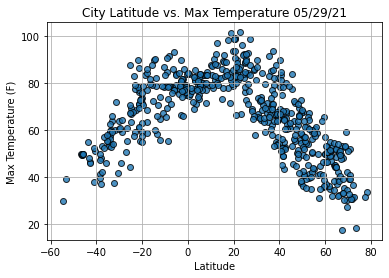

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

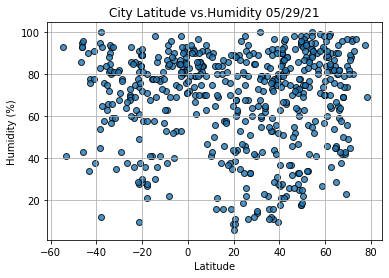

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

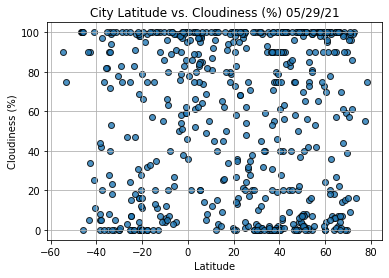

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

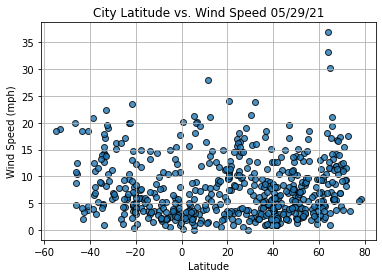

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()



In [23]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2021-05-29 20:00:16
Lat                      -23.1203
Lng                      -134.969
Max Temp                    77.22
Humidity                       86
Cloudiness                     91
Wind Speed                  19.98
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2021-05-29 20:00:15,71.6872,128.8694,31.50,97,86,9.28
2,San Francisco,US,2021-05-29 20:05:05,37.7749,-122.4194,79.14,77,75,5.01
4,Ribeira Grande,PT,2021-05-29 20:00:37,38.5167,-28.7000,66.60,77,75,4.61
6,Talnakh,RU,2021-05-29 20:00:40,69.4865,88.3972,27.48,97,98,4.52
7,Albany,US,2021-05-29 20:00:08,42.6001,-73.9662,52.72,76,100,6.24
...,...,...,...,...,...,...,...,...,...
553,Alekseyevsk,RU,2021-05-29 20:08:06,57.8406,108.3492,35.15,91,100,2.66
554,Vila,PT,2021-05-29 20:01:18,42.0304,-8.1588,64.22,87,63,4.38
556,Dhekiajuli,IN,2021-05-29 20:08:06,26.7000,92.5000,76.66,89,17,0.60
557,Kilcoole,IE,2021-05-29 20:08:06,53.1028,-6.0650,60.58,86,73,2.55


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

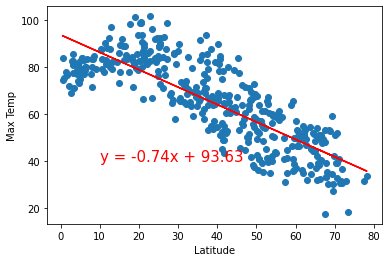

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

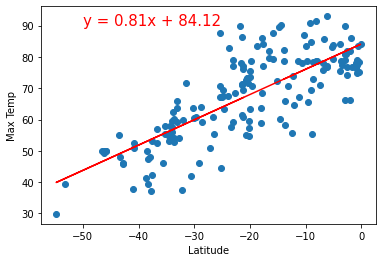

In [27]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

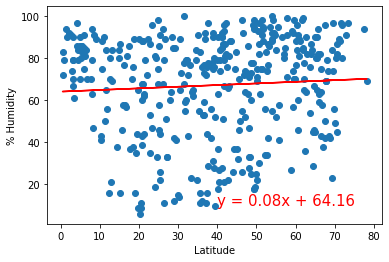

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

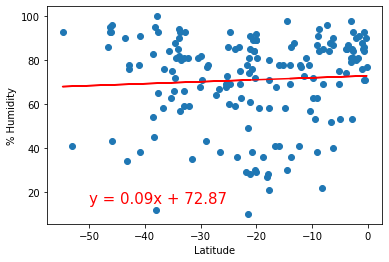

In [29]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

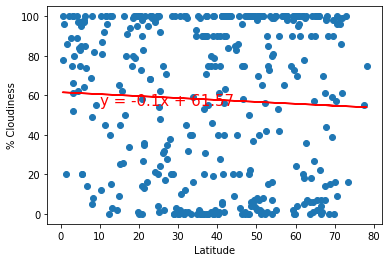

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Northern Hemisphere \
                     for % Cloudiness', '% Cloudiness',(10,55))

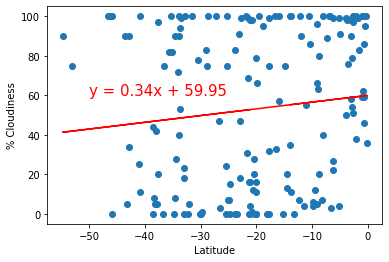

In [31]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Southern Hemisphere \
                     for % Cloudiness', '% Cloudiness',(-50,60))

In [32]:
# Import time
#time.sleep()
